#📌 Extracción

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_json('TelecomX_Data.json')

# Mostrar información básica del dataset
print("Información del dataset:")
print(df.info())
print("\nPrimeras filas del dataset:")
print(df.head())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None

Primeras filas del dataset:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                            

#🔧 Transformación

In [3]:
# Expandir las columnas anidadas
df_expanded = pd.DataFrame()
df_expanded['customerID'] = df['customerID']
df_expanded['Churn'] = df['Churn']

# Expandir datos del cliente
df_expanded = pd.concat([df_expanded, pd.json_normalize(df['customer'])], axis=1)

# Expandir datos del teléfono
df_expanded = pd.concat([df_expanded, pd.json_normalize(df['phone'])], axis=1)

# Expandir datos de internet
df_expanded = pd.concat([df_expanded, pd.json_normalize(df['internet'])], axis=1)

# Expandir datos de la cuenta
df_expanded = pd.concat([df_expanded, pd.json_normalize(df['account'])], axis=1)

# Reemplazar df original
df = df_expanded

# Verificar valores nulos
print("Valores nulos en el dataset:")
print(df.isnull().sum())

# Verificar valores duplicados
print("\nNúmero de registros duplicados:", df.duplicated().sum())

# Convertir 'SeniorCitizen' a tipo categórico
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Convertir variables categóricas a tipo 'category'
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                      'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                      'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Verificar tipos de datos después de la transformación
print("\nTipos de datos después de la transformación:")
print(df.dtypes)

Valores nulos en el dataset:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Número de registros duplicados: 0

Tipos de datos después de la transformación:
customerID            object
Churn               category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
Streaming

#📊 Carga y análisis

Distribución de Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Tasa de Churn: 25.72%


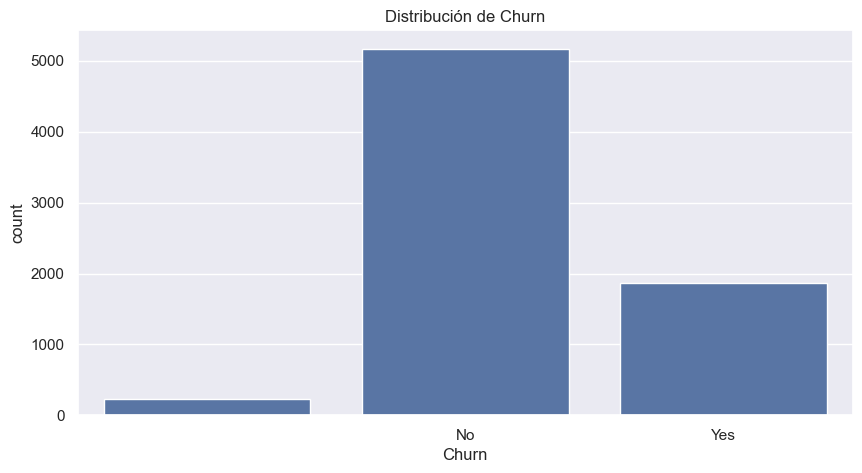

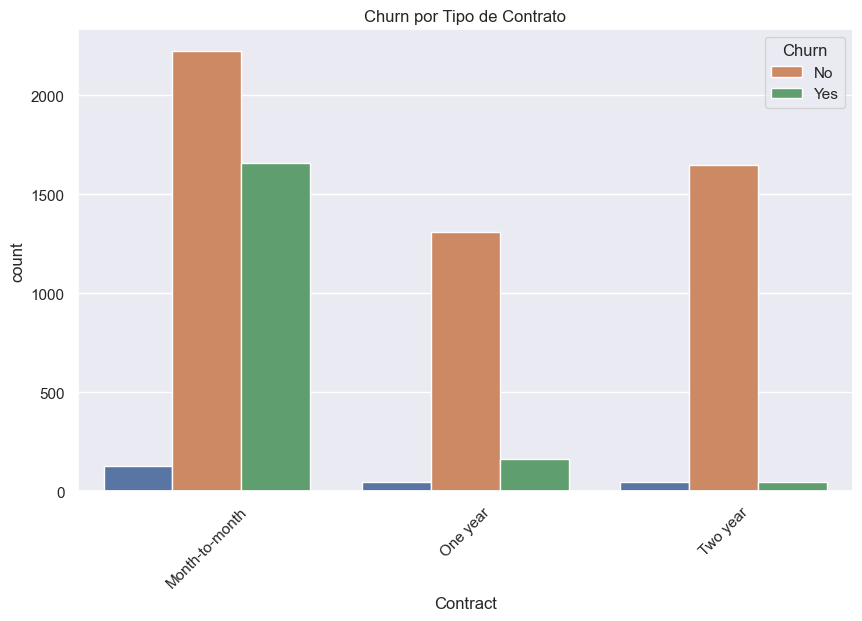

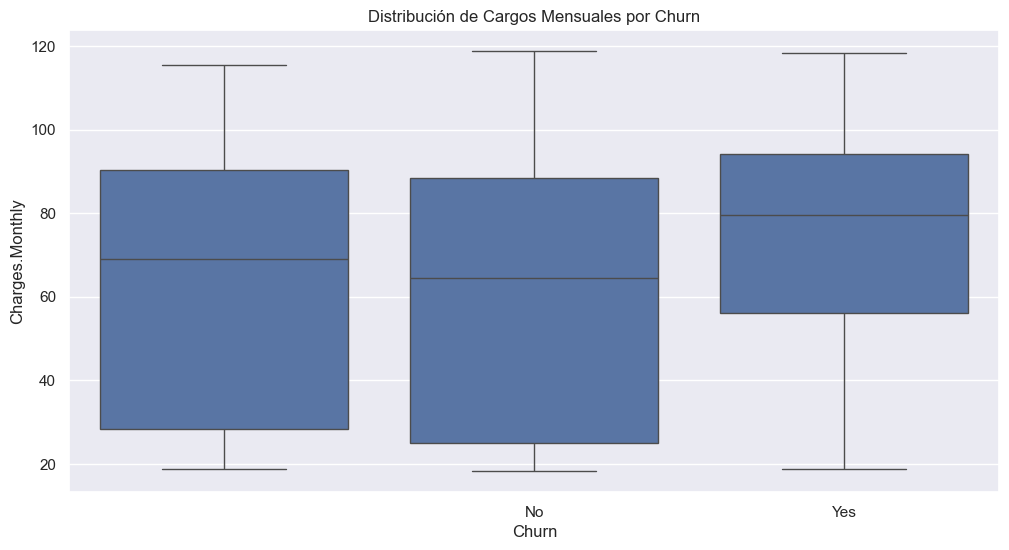

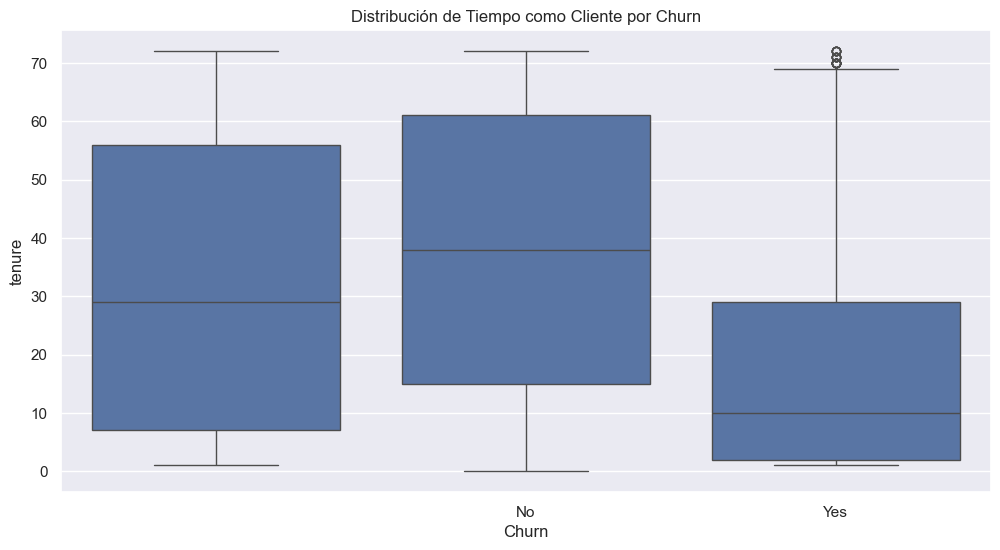

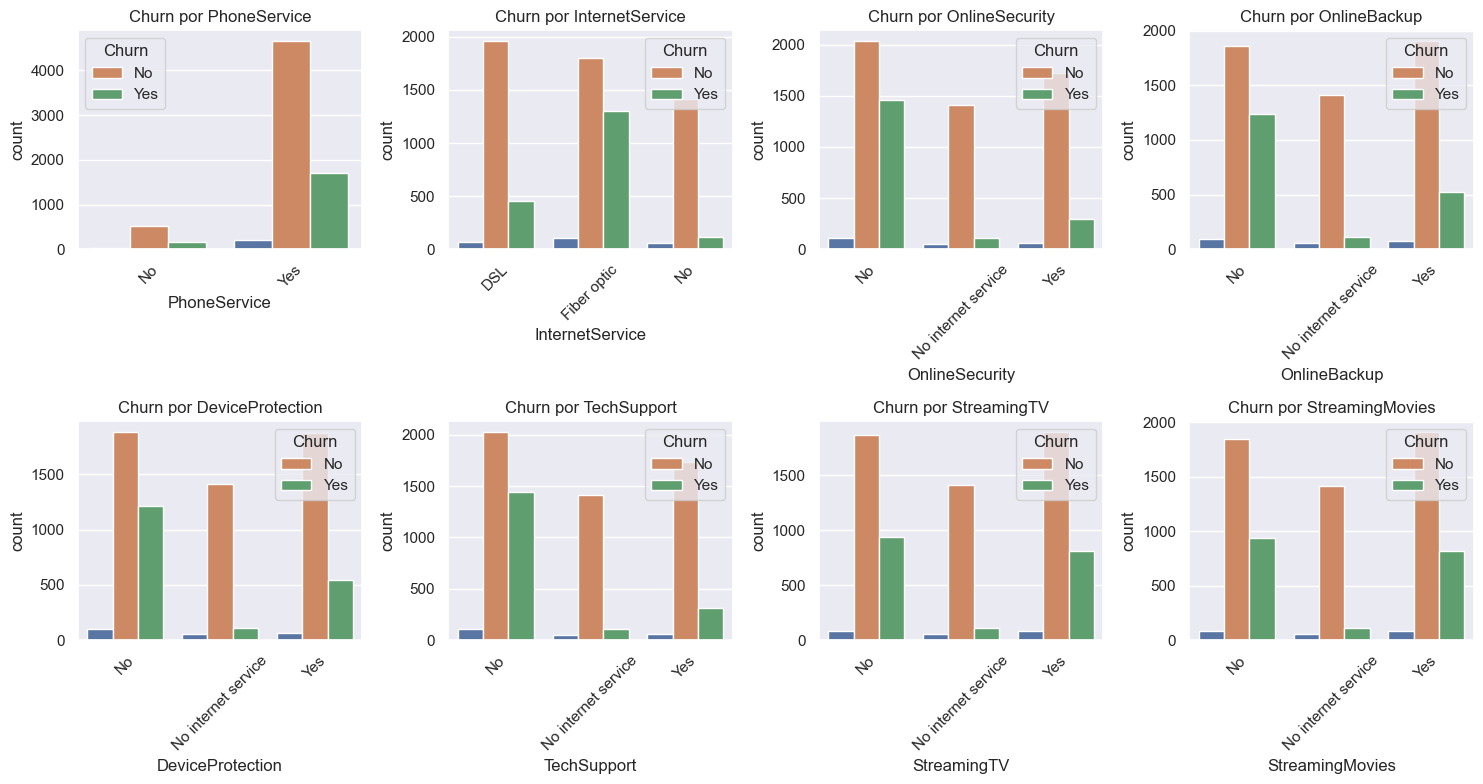

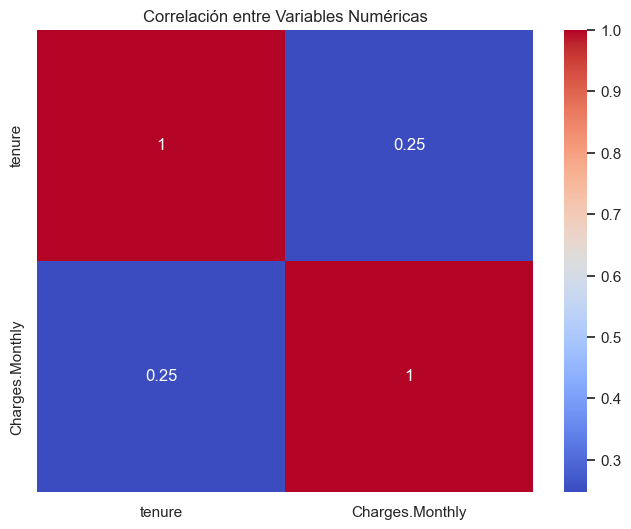

In [4]:
# Configuración de estilo para las visualizaciones
sns.set_theme()

# 1. Análisis de Churn
print("Distribución de Churn:")
churn_dist = df['Churn'].value_counts()
print(churn_dist)
print(f"\nTasa de Churn: {(churn_dist['Yes'] / len(df) * 100):.2f}%")

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Churn')
plt.show()

# 2. Análisis por tipo de contrato
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.xticks(rotation=45)
plt.show()

# 3. Análisis de características numéricas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Churn', y='Charges.Monthly')
plt.title('Distribución de Cargos Mensuales por Churn')
plt.show()

# 4. Análisis de tenure (tiempo como cliente)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Distribución de Tiempo como Cliente por Churn')
plt.show()

# 5. Análisis de servicios
servicios = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(15, 8))
for i, servicio in enumerate(servicios, 1):
    plt.subplot(2, 4, i)
    sns.countplot(data=df, x=servicio, hue='Churn')
    plt.title(f'Churn por {servicio}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Correlación entre variables numéricas
numeric_cols = ['tenure', 'Charges.Monthly']
correlation = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables Numéricas')
plt.show()

In [5]:

df.to_csv("datos_tratados.csv", index=False) 


#📄Informe final

# Informe de Análisis de Churn en TelecomX

## 1. Resumen General
- La tasa de abandono (churn) es del 25.72%, lo que significa que aproximadamente 1 de cada 4 clientes abandona el servicio.
- No se encontraron valores nulos ni duplicados en el conjunto de datos.

## 2. Hallazgos Principales

### Contratos y Permanencia
- Los clientes con contratos mensuales tienen una tasa de abandono significativamente mayor.
- Los clientes con contratos a largo plazo (dos años) muestran menor probabilidad de abandono.
- Existe una correlación positiva (0.25) entre el tiempo como cliente (tenure) y los cargos mensuales.

### Servicios y Seguridad
- Los clientes sin servicios de seguridad en línea tienen mayor probabilidad de abandono.
- Los clientes sin soporte técnico muestran tasas más altas de abandono.
- La falta de servicios de respaldo en línea y protección de dispositivos también se correlaciona con mayores tasas de abandono.

### Servicios de Internet y Entretenimiento
- Los usuarios de fibra óptica muestran tasas de abandono más altas que los usuarios de DSL.
- Los clientes sin servicios de streaming (TV y películas) tienen mayor probabilidad de abandonar.

## 3. Recomendaciones

1. **Fomentar Contratos a Largo Plazo**
   - Desarrollar incentivos para que los clientes opten por contratos de mayor duración.
   - Ofrecer descuentos o beneficios exclusivos para contratos anuales o bianuales.

2. **Mejorar Servicios de Seguridad y Soporte**
   - Fortalecer la oferta de servicios de seguridad en línea.
   - Mejorar la accesibilidad y calidad del soporte técnico.
   - Promover paquetes que incluyan protección de dispositivos y respaldo en línea.

3. **Optimizar Servicios de Internet**
   - Investigar y mejorar la satisfacción de los usuarios de fibra óptica.
   - Considerar planes personalizados según el uso y necesidades del cliente.

4. **Servicios de Valor Agregado**
   - Promocionar paquetes que incluyan servicios de streaming.
   - Desarrollar ofertas combinadas atractivas de internet y entretenimiento.